Grupa 5

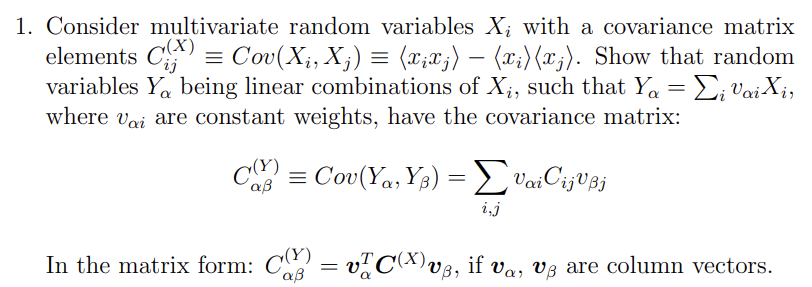

In [1]:
import numpy as np

def compute_covariance_Y(v, C_X):
    return v.T @ C_X @ v

C_X = np.array([[1.0, 0.5, 0.2],
                [0.5, 1.0, 0.3],
                [0.2, 0.3, 1.0]])

v = np.array([[1.0, 0.5],
              [0.5, 1.0],
              [0.2, 0.3]])

C_Y = compute_covariance_Y(v, C_X)

print("Covariance matrix C(Y):")
print(C_Y)


Covariance matrix C(Y):
[[1.93 1.87]
 [1.87 2.08]]


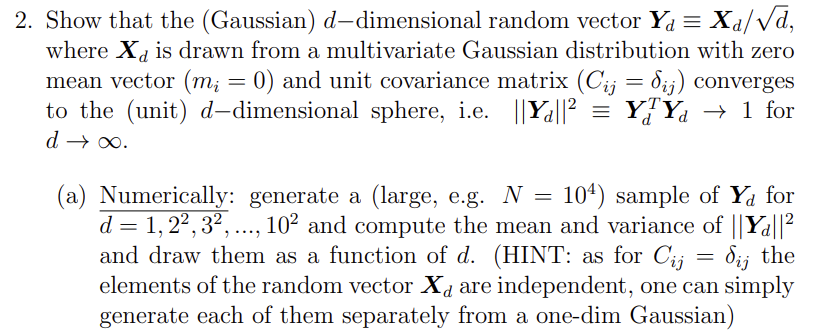

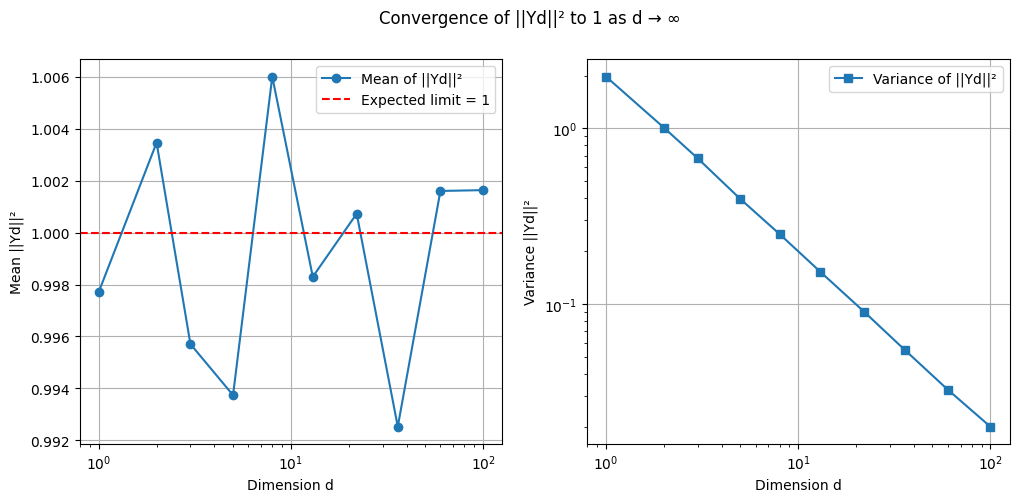

In [5]:
import matplotlib.pyplot as plt

N = 10**4 
dims = np.round(np.logspace(0, 2, 10)).astype(int)

mean_norms = []
var_norms = []

for d in dims:
    Xd = np.random.randn(N, d) 
    Yd = Xd / np.sqrt(d) 
    norms_squared = np.sum(Yd**2, axis=1) 
    
    mean_norms.append(np.mean(norms_squared)) 
    var_norms.append(np.var(norms_squared)) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(dims, mean_norms, marker='o', label="Mean of ||Yd||²")
plt.axhline(y=1, color='r', linestyle='--', label="Expected limit = 1")
plt.xlabel("Dimension d")
plt.ylabel("Mean ||Yd||²")
plt.xscale("log")
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
plt.plot(dims, var_norms, marker='s', label="Variance of ||Yd||²")
plt.xlabel("Dimension d")
plt.ylabel("Variance ||Yd||²")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()

plt.suptitle("Convergence of ||Yd||² to 1 as d → ∞")
plt.show()


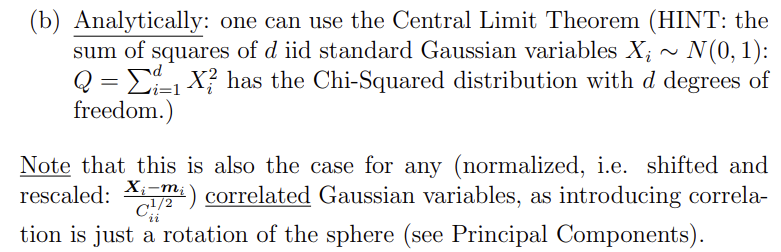

Odpowiedź w zdjęciu 2.2.jpg

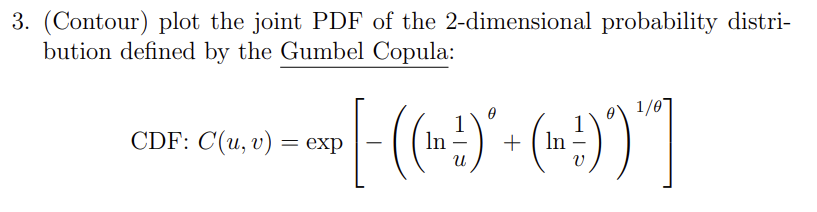

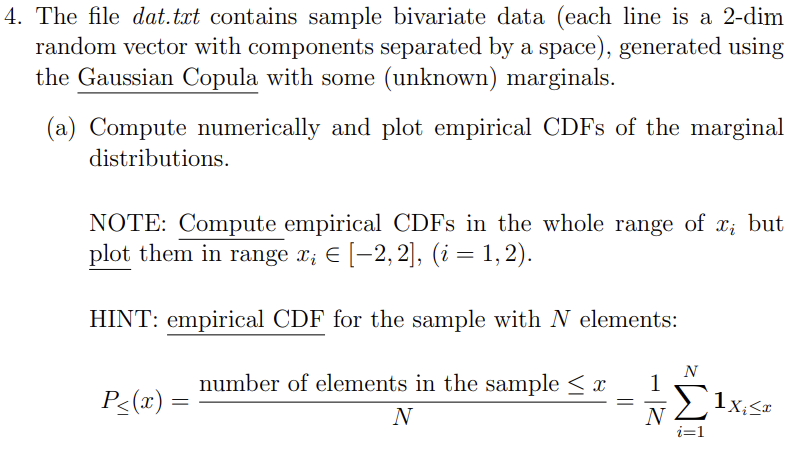

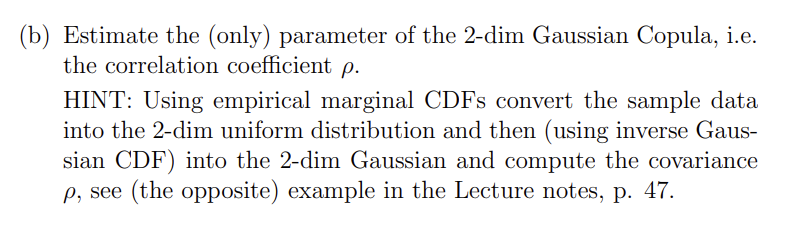